In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# Import the necessary framework and library
import cv2, os, datetime
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from google.colab import files
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, EfficientNetB1
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.backend import clear_session
from imutils import paths

In [ ]:
# Upload kaggle json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bahawilliamsazael","key":"9d0f8a3d824ce2fff8d69f9651b16755"}'}

In [ ]:
# Create kaggle folder
!mkdir ~/.kaggle

# Copy kaggle json file to folder created
!cp kaggle.json ~/.kaggle/

# Permission json to act
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset batik from kaggle
!kaggle datasets download -d alfanme/indonesian-batik-motifs-corak-app

 92% 143M/156M [00:00<00:00, 185MB/s]
100% 156M/156M [00:00<00:00, 170MB/s]


In [ ]:
# Unzip the file
!unzip indonesian-batik-motifs-corak-app.zip

Archive:  indonesian-batik-motifs-corak-app.zip
  inflating: DATASET/DATASET/TEST/Batik Bali/70.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/71.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/72.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/73.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/74.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/75.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/76.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/77.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/78.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/79.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/80.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/81.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/82.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/83.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/84.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/85.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/86.jpg  
  inflating: DATASET/DATASET/TEST/

In [ ]:
'''#Delete The other dataset and rename the main dataset
if os.path.exists("/content/DATASET"):
    shutil.rmtree("/content/DATASET")

if os.path.exists("/content/DATASETmin"):
    shutil.rmtree("/content/DATASETmin")

if os.path.exists("/content/DATASETv4"):
    shutil.rmtree("/content/DATASETv4")

if os.path.exists("/content/DATASETv7"):
    os.rename("/content/DATASETv7", "/content/DATASET")

In [ ]:
'''# Create the TEST path dataset
TEST_dataset_paths = {
    'TEST Batik Bali': '/content/DATASET/TEST/Batik Bali',
    'TEST Batik Betawi': '/content/DATASET/TEST/Batik Betawi',
    'TEST Batik Cendrawasih': '/content/DATASET/TEST/Batik Cendrawasih',
    'TEST Batik Dayak' : '/content/DATASET/TEST/Batik Dayak',
    'TEST Batik Geblek Renteng' : '/content/DATASET/TEST/Batik Geblek Renteng',
    'TEST Batik Ikat Celup' : '/content/DATASET/TEST/Batik Ikat Celup',
    'TEST Batik Insang' : '/content/DATASET/TEST/Batik Insang',
    'TEST Batik Kawung' : '/content/DATASET/TEST/Batik Kawung',
    'TEST Batik Lasem' : '/content/DATASET/TEST/Batik Lasem',
    'TEST Batik Megamendung' :  '/content/DATASET/TEST/Batik Megamendung',
    'TEST Batik Pala' : '/content/DATASET/TEST/Batik Pala',
    'TEST Batik Parang' : '/content/DATASET/TEST/Batik Parang',
    'TEST Batik Poleng' : '/content/DATASET/TEST/Batik Poleng',
    'TEST Batik Sekar Jagad' : '/content/DATASET/TEST/Batik Sekar Jagad',
    'TEST Batik Tambal' : '/content/DATASET/TEST/Batik Tambal',
}

In [ ]:
'''# Create the TRAIN path dataset
TRAIN_dataset_paths = {
    'TRAIN Batik Bali': '/content/DATASET/TRAIN/Batik Bali',
    'TRAIN Batik Betawi': '/content/DATASET/TRAIN/Batik Betawi',
    'TRAIN Batik Cendrawasih': '/content/DATASET/TRAIN/Batik Cendrawasih',
    'TRAIN Batik Dayak' : '/content/DATASET/TRAIN/Batik Dayak',
    'TRAIN Batik Geblek Renteng' : '/content/DATASET/TRAIN/Batik Geblek Renteng',
    'TRAIN Batik Ikat Celup' : '/content/DATASET/TRAIN/Batik Ikat Celup',
    'TRAIN Batik Insang' : '/content/DATASET/TRAIN/Batik Insang',
    'TRAIN Batik Kawung' : '/content/DATASET/TRAIN/Batik Kawung',
    'TRAIN Batik Lasem' : '/content/DATASET/TRAIN/Batik Lasem',
    'TRAIN Batik Megamendung' :  '/content/DATASET/TRAIN/Batik Megamendung',
    'TRAIN Batik Pala' : '/content/DATASET/TRAIN/Batik Pala',
    'TRAIN Batik Parang' : '/content/DATASET/TRAIN/Batik Parang',
    'TRAIN Batik Poleng' : '/content/DATASET/TRAIN/Batik Poleng',
    'TRAIN Batik Sekar Jagad' : '/content/DATASET/TRAIN/Batik Sekar Jagad',
    'TRAIN Batik Tambal' : '/content/DATASET/TRAIN/Batik Tambal',
}

In [ ]:
'''# Set the base directories for TRAIN and TEST
base_train_dir = '/content/DATASETv7/TRAIN'
base_test_dir = '/content/DATASET/TEST'

# Create an empty list to store DataFrames for TEST
frames_test = []

# Traverse the new directory structure for TEST datasets
for dataset_name, dataset_path in TEST_dataset_paths.items():
    num_images = len(os.listdir(os.path.join(base_test_dir, dataset_path)))
    frames_test.append(pd.DataFrame({
        'Dataset': [dataset_name],
        'Number of Images': [num_images]
    }))

# Check if TEST datasets were found
if frames_test:
    # Concatenate the list of DataFrames into a single DataFrame for TEST
    dataset_summary_test = pd.concat(frames_test, ignore_index=True)

    # Sort the DataFrame by the 'Dataset' column for TEST
    dataset_summary_test = dataset_summary_test.sort_values(by='Dataset', ignore_index=True)

    # Print the sorted summary table for TEST
    print("Summary for TEST datasets:")
    print(dataset_summary_test)
else:
    print("No TEST datasets found.")

# Create an empty list to store DataFrames for TRAIN
frames_train = []

# Traverse the new directory structure for TRAIN datasets
for dataset_name, dataset_path in TRAIN_dataset_paths.items():
    num_images = len(os.listdir(os.path.join(base_train_dir, dataset_path)))
    frames_train.append(pd.DataFrame({
        'Dataset': [dataset_name],
        'Number of Images': [num_images]
    }))

# Check if TRAIN datasets were found
if frames_train:
    # Concatenate the list of DataFrames into a single DataFrame for TRAIN
    dataset_summary_train = pd.concat(frames_train, ignore_index=True)

    # Sort the DataFrame by the 'Dataset' column for TRAIN
    dataset_summary_train = dataset_summary_train.sort_values(by='Dataset', ignore_index=True)

    # Print the sorted summary table for TRAIN
    print("\nSummary for TRAIN datasets:")
    print(dataset_summary_train)
else:
    print("No TRAIN datasets found.")

In [ ]:
'''# User input for dataset type selection
print("Available dataset types:")
print("0. TEST")
print("1. TRAIN")

dataset_type_index = int(input("Enter the index of the dataset type: "))
selected_dataset_type = "TEST" if dataset_type_index == 0 else "TRAIN"
selected_dataset_paths = TEST_dataset_paths if dataset_type_index == 0 else TRAIN_dataset_paths

# User input for dataset selection within the chosen type
print(f"\nAvailable {selected_dataset_type} datasets:")
for i, dataset_name in enumerate(selected_dataset_paths.keys()):
    print(f"{i}. {dataset_name}")

dataset_index = int(input(f"Enter the index of the {selected_dataset_type} dataset: "))
selected_dataset = list(selected_dataset_paths.values())[dataset_index]

# Display the selected dataset
print(f"\nSelected {selected_dataset_type} Dataset: {list(selected_dataset_paths.keys())[dataset_index]}")
print(f"Number of Images: {len(os.listdir(selected_dataset))}")

# User input for image selection within the chosen dataset
image_index = int(input(f"Enter the index of the image (0 to {len(os.listdir(selected_dataset))-1}): "))
selected_image_path = os.path.join(selected_dataset, os.listdir(selected_dataset)[image_index])

# Display the selected image
plt.imshow(load_img(selected_image_path))
plt.show()

In [ ]:
'''# User input for dataset type selection
print("Available dataset types:")
print("0. TEST")
print("1. TRAIN")

dataset_type_index = int(input("Enter the index of the dataset type: "))
selected_dataset_type = "TEST" if dataset_type_index == 0 else "TRAIN"
selected_dataset_base_path = '/content/DATASET/TEST' if dataset_type_index == 0 else '/content/DATASET/TRAIN'

# User input for dataset selection within the chosen type
print(f"\nAvailable {selected_dataset_type} datasets:")
datasets = sorted(os.listdir(selected_dataset_base_path))
for i, dataset in enumerate(datasets):
    print(f"{i}. {dataset}")

dataset_index = int(input(f"Enter the index of the {selected_dataset_type} dataset: "))

# Form the path to the selected dataset
selected_dataset_path = os.path.join(selected_dataset_base_path, datasets[dataset_index])

# List all images in the selected dataset and sort them
dataset_images = sorted(os.listdir(selected_dataset_path))

# Iterate over images and print information
for image_name in dataset_images:
    # Form the path to the selected image
    selected_image_path = os.path.join(selected_dataset_path, image_name)

    # Load the image
    sample_image = load_img(selected_image_path)

    # Convert the image into its numpy array representation
    sample_array = img_to_array(sample_image)

    print(f"\nImage: {image_name}")
    print(f"Shape: {sample_array.shape}")
    print(f"Maximum Pixel Value: {np.max(sample_array)}")

In [ ]:
# Set the base directories for TRAIN and TEST
base_train_dir = '/content/DATASETv7/TRAIN'
base_test_dir = '/content/DATASETv7/TEST'

# Data preprocessing
train_datagen = ImageDataGenerator(
     rescale=1./255,
    shear_range=0.2,
    rotation_range=30,
    fill_mode='reflect',
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Rescaling for validation/test images
validation_datagen = ImageDataGenerator(
     rescale=1./255,
    shear_range=0.2,
    rotation_range=30,
    fill_mode='reflect',
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    directory=base_train_dir,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=30,
    color_mode='rgb'
)

# Load and preprocess training data
validation_generator = validation_datagen.flow_from_directory(
    directory=base_test_dir,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=30,
    color_mode='rgb'
)

Found 1050 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [ ]:
# Create the Model trainning
#gw nyoba resnet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), alpha=1.0, pooling='avg')

# Fine-tune the base model
base_model.trainable = False

# Create the Model training
model = Sequential([
    base_model,
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(15, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 2423887 (9.25 MB)
Trainable params: 165903 (648.06 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.85):
            print("\n Desired accuracy > 85%, stopping...")
            self.model.stop_training = True

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4), #0.0001
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
callback=myCallback()

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=1050//30,
    validation_steps=300//30,
    shuffle=True,
    epochs=100,
    callbacks=[callback]
)

Epoch 1/100
35/35 [==============================] - 29s 582ms/step - loss: 2.9206 - accuracy: 0.0838 - val_loss: 2.5586 - val_accuracy: 0.1600
Epoch 2/100
35/35 [==============================] - 23s 657ms/step - loss: 2.4909 - accuracy: 0.2048 - val_loss: 2.2787 - val_accuracy: 0.2833
Epoch 3/100
35/35 [==============================] - 20s 577ms/step - loss: 2.2473 - accuracy: 0.2857 - val_loss: 2.0585 - val_accuracy: 0.4000
Epoch 4/100
35/35 [==============================] - 20s 577ms/step - loss: 2.0536 - accuracy: 0.3724 - val_loss: 1.8716 - val_accuracy: 0.4333
Epoch 5/100
35/35 [==============================] - 21s 600ms/step - loss: 1.8752 - accuracy: 0.4200 - val_loss: 1.7316 - val_accuracy: 0.4933
Epoch 6/100
35/35 [==============================] - 19s 560ms/step - loss: 1.7375 - accuracy: 0.4800 - val_loss: 1.6587 - val_accuracy: 0.4967
Epoch 7/100
35/35 [==============================] - 26s 744ms/step - loss: 1.6293 - accuracy: 0.4990 - val_loss: 1.5159 - val_accuracy:

In [ ]:
model.save('mdl85.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


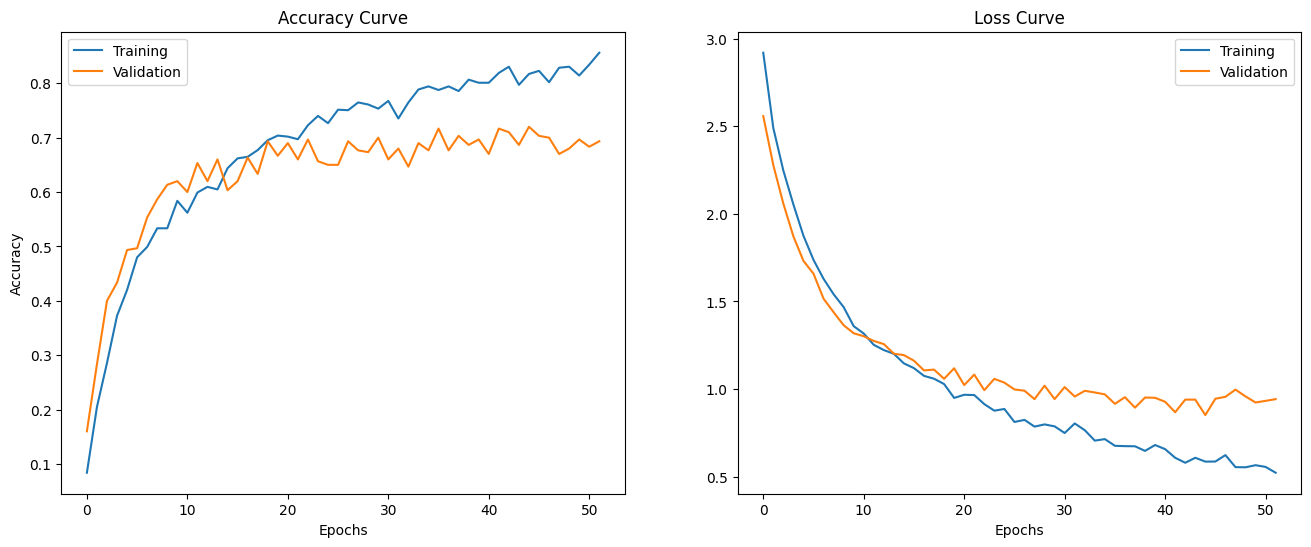

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')

plt.show()

In [ ]:
motives_class = {'Batik Bali': 0,
                'Batik Betawi': 1,
                'Batik Cendrawasih': 2,
                'Batik Dayak': 3,
                'Batik Geblek Renteng': 4,
                'Batik Ikat Celup': 5,
                'Batik Insang': 6,
                'Batik Kawung': 7,
                'Batik Lasem': 8,
                'Batik Megamendung': 9,
                'Batik Pala': 10,
                'Batik Parang': 11,
                'Batik Poleng': 12,
                'Batik Sekar Jagad': 13,
                'Batik Tambal': 14}

In [ ]:
test_dir = '/content/DATASETv7/TEST/'
for motive in motives_class.keys():
    images_list = os.listdir(os.path.join(test_dir, motive))
    # plt.figure(figsize=(16, 20))

    correct_count = 0

    for idx, image in enumerate(images_list):
        img_path = f'/content/DATASETv7/TEST/{motive}/{image}'
        img = load_img(img_path, target_size=(224, 224))

        img_array = img_to_array(img) / 255.0
        img_array = tf.expand_dims(img_array, 0)

        motives_list = list(motives_class.keys())
        prediction = model(img_array)
        pred_idx = np.argmax(prediction)
        pred_motive = motives_list[pred_idx]
        pred_confidence = prediction[0][pred_idx] * 100

        if pred_motive == motive:
            correct_count += 1

    print(f'{motive} Predictions --> {correct_count}/20 correct')


Batik Bali Predictions --> 10/20 correct
Batik Betawi Predictions --> 12/20 correct
Batik Cendrawasih Predictions --> 14/20 correct
Batik Dayak Predictions --> 17/20 correct
Batik Geblek Renteng Predictions --> 7/20 correct
Batik Ikat Celup Predictions --> 15/20 correct
Batik Insang Predictions --> 12/20 correct
Batik Kawung Predictions --> 18/20 correct
Batik Lasem Predictions --> 11/20 correct
Batik Megamendung Predictions --> 19/20 correct
Batik Pala Predictions --> 10/20 correct
Batik Parang Predictions --> 16/20 correct
Batik Poleng Predictions --> 16/20 correct
Batik Sekar Jagad Predictions --> 15/20 correct
Batik Tambal Predictions --> 19/20 correct


In [ ]:
# Upload a batik file
uploaded = files.upload()

# Choose the uploaded file
file_name = list(uploaded.keys())[0]
file_path = file_name

# Load and preprocess the image
img = image.load_img(file_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions[0])
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

# Display the uploaded image and prediction
from IPython.display import display, Image

display(Image(filename=file_path, width=200, height=200))
print(f"Predicted class: {predicted_class}")

Saving lasem.jpeg to lasem.jpeg


NameError: ignored

Saving Batik Cendrawasih-4.jpg to Batik Cendrawasih-4.jpg
1/1 [==============================] - 1s 780ms/step
class index is :  2


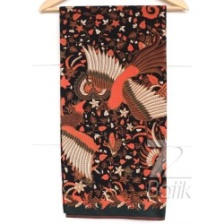

Predicted class: Batik Cendrawasih


In [ ]:
##THIS BLOCK IS TEMPORARY
#Load (biar gaperlu train ulang, load aja model yang udh disimpen tadi di sini(up dari lokal, taruh di storage sementara))
model = load_model('mdl85.h5')
# Upload a batik file
uploaded = files.upload()

# Choose the uploaded file
file_name = list(uploaded.keys())[0]
file_path = file_name

# Load and preprocess the image
img = image.load_img(file_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions[0])
print('class index is : ',(predicted_class_index))
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

# Display the uploaded image and prediction
from IPython.display import display, Image

display(Image(filename=file_path, width=200, height=200))
print(f"Predicted class: {predicted_class}")